In [1]:
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fi =  "indata/3pipesL"         #location of .inp file
fc = "indata/3pipesL"          #location of .config file
mtype = 1                      #model used along network edges. 1 for Preissman Slot. 0 for uniform
V0 =[]
Vf = []
Hbar = []
legs = []
lr = []

In [3]:
for i in range(0,8):
    fii = fi+"%d.inp"%i
    fci = fc+"%d.config"%i
    print fci
    n0 = PyNetwork(fii, fci, mtype)     #a network object
    T = n0.T
    M = n0.M
    dt = T/M
    print "T = %.2f M = %d , L = [%.f, %.f, %.f]"%(T,M, n0.Ls[0], n0.Ls[1], n0.Ls[2])
    V0.append(n0.getTotalVolume())
    n0.runForwardProblem(dt)
    Vf.append(n0.getTotalVolume())
    htmp = [n0.getAveGradH(i) for i in range(n0.M+1)]
    Hbar.append(htmp)
    #Hmax.append(max([n0.q]))
    lr.append(n0.Ls[2]/n0.Ls[1])
    legs.append("L1/L2 = %1.2f"%(n0.Ls[2]/n0.Ls[1]))


indata/3pipesL0.config
T = 25.00 M = 7500 , L = [100, 100, 25]
indata/3pipesL1.config
T = 25.00 M = 7500 , L = [100, 100, 50]
indata/3pipesL2.config
T = 25.00 M = 7500 , L = [100, 100, 75]
indata/3pipesL3.config
T = 25.00 M = 7500 , L = [100, 100, 100]
indata/3pipesL4.config
T = 25.00 M = 7500 , L = [100, 100, 125]
indata/3pipesL5.config
T = 25.00 M = 7500 , L = [100, 100, 150]
indata/3pipesL6.config
T = 25.00 M = 7500 , L = [100, 100, 175]
indata/3pipesL7.config
T = 25.00 M = 7500 , L = [100, 100, 200]


L1/L2 & mean (dH/dx) &  max(dH/dx) &  (V(0)-V(T))/V0\
\hline\
0.25    & 0.0059    &   0.0715 &  0.0017\\
0.50    & 0.0029    &   0.0376 &  0.0029\\
0.75    & 0.0028    &   0.0277 &  0.0028\\
1.00    & 0.0030    &   0.0337 &  0.0034\\
1.25    & 0.0015    &   0.0112 &  0.0024\\
1.50    & 0.0012    &   0.0110 &  0.0023\\
1.75    & 0.0012    &   0.0110 &  0.0023\\
2.00    & 0.0012    &   0.0109 &  0.0022\\


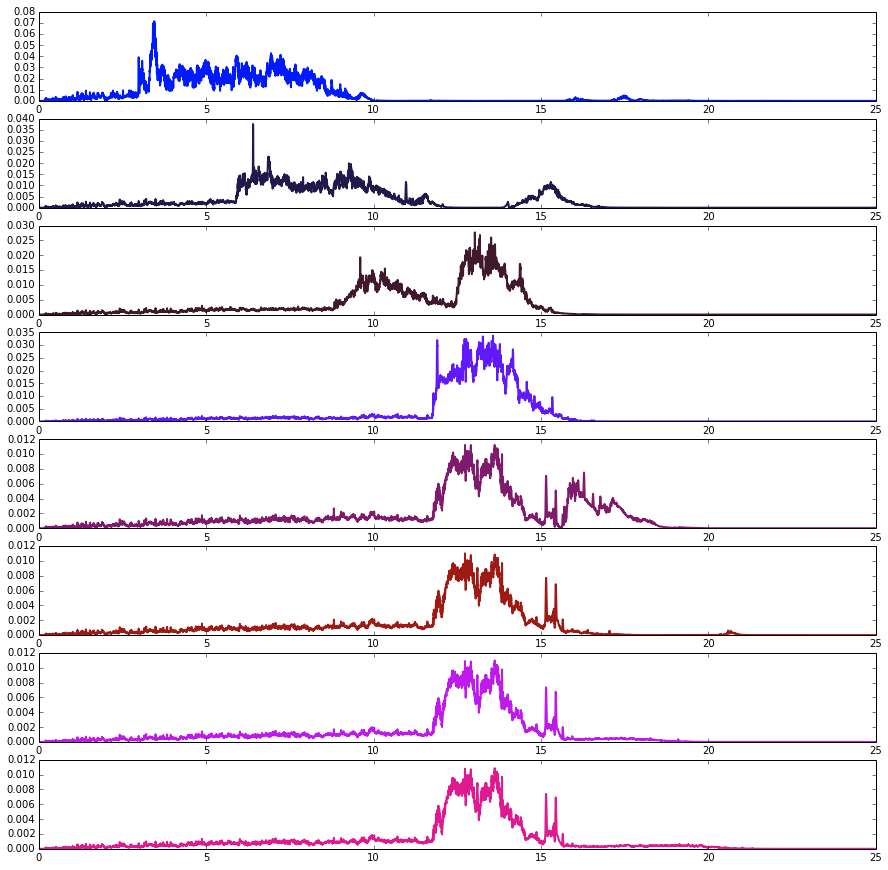

In [22]:
t = linspace(0,T,M+1);
Nh = len(legs)
print "L1/L2 & mean (dH/dx) &  max(dH/dx) &  (V(0)-V(T))/V0\\\n\hline\\"
fig,ax = plt.subplots(nrows = Nh,figsize=(15,15))
for i in range(8):
    #ax.plot(t,Hbar[i],c =(i/8., .1, cos(i)**2),linewidth=2)
    ax[i].plot(t,Hbar[i],c =(i/8., .1, cos(i)**2),linewidth=2)
    print "%1.2f    & %03.4f    &   %3.4f &  %.4f\\\\"%(lr[i], mean(Hbar[i]), max(Hbar[i]), (V0[i]-Vf[i])/V0[i])
    #ax[i].text(20,100,"L1/L2=%1.2f"%lr[i])
    #ax[i].set_ylim([0,.09])
    #ax[i].set_yticks([0,60,120])
    #if i<Nh-1:
    #     ax[i].set_xticklabels([])
    #ax[i].set_ylabel('<dH/dx>')
#ax[i].set_xlabel('t (s)')
#savefig("../../dhdxresults.eps", format='eps')
#plt.show()
#plot(lr, [max(Hbar[i]) for i in range(len(Hbar))],'o')


In [14]:
print n0.a


[100.0, 100.0, 100.0]


In [15]:
print n0.Ls

[ 100.  100.  200.]


In [16]:
dx = n0.Ls[0]/n0.Ns[0]

In [17]:
dt/dx*n0.cmax[2]

0.10261722909898735

In [18]:
dt/dx*n0.a[0]

1.3333333333333335

In [23]:
n0.M

7500

In [28]:
18/7500./dx*n0.a[0]

0.95999999999999996